<img src='https://www.kaggle.com/static/images/site-logo.svg'
    style='width:100px; float: right; margin: 0 10px 10px 10px'></img>
# *Data Analyst Job Roles in Canada* 
<hr style='margin-bottom: 40px;'>
<img src="https://www.iiba.org/contentassets/6855a0ee88044b6cabe767d7a49506ba/importance-of-the-bda-role-on-a-team-header.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

##### 28/08/2024
### Ahmad Ryan Permana
[Follow this data in Kaggle](https://www.kaggle.com/datasets/amanbhattarai695/data-analyst-job-roles-in-canada)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Research Objectives

- Find out what Data Analyst positions and roles are currently most demand in Canada.
- Find out the number and distribution of job openings for the role of data analyst across different regions in Canada.
- Find out what skills are most commonly required by employers for data analyst roles in Canada.
- Find out the salary ranges offered for data analyst roles in Canada, as well as how they may differ based on location or expected experience.

## What is the problem?

- What data analysis positions and roles are most in demand and sought after by employers in Canada?
- How many job openings are there for data analyst roles in Canada, and how are they distributed by region?
- What skills are most commonly required by employers for data analyst roles in Canada?
- What salary ranges are offered for data analyst roles in Canada, and how do they differ based on location or experience?

<hr style='margin-bottom: 10px;'>

### Package Library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import openpyxl
from scipy.stats import gamma
import matplotlib.pyplot as plt
from main import MergeFunction, PreprocessingData, CheckData
pd.options.mode.chained_assignment = None
print(pd.__version__)
print(np.__version__)
print(re.__version__)

2.2.2
2.0.1
2.2.1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Loading The Dataset

In [2]:
data = MergeFunction('Raw_Dataset.csv')

In [3]:
data.OpenData

0 Job ID,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link

1 job_9c7f38160c736c78,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",,Remote,,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c78&bb=JmRuzeGvy_2zALhxc3MIarBRFhvpJXOqvUAT4gD16kUZBZqrZaincbr5w5GdeFRFR5lVtTDOSYG3qRaaNlxCUd9iAZ4zNGSHhliXAEOF9EZGPfKdnjt04V6CWqv09NoG&xkcb=SoBd67M39Kh62wxBJh0LbzkdCdPP&fccid=ac2ee5578fa99fc9&vjs=3

2 job_0da15fed6a515fe5,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",,Remote,,https://ca.indeed.com/rc/clk?jk=0da15fed6a515fe5&bb=JmRuzeGvy_2zALhxc3MIapjGJCLVcfQuCXINMD0ZX2fshGsyE-WbuTySCweFufuqm7KUD9RgNijBjXW5Y4k44BE95OTVsCTPSV-_TqRmi8c76PdKhL3qNw%3D%3D&xkcb=SoDp67M39Kh62wxBJh0KbzkdCdPP&fccid=a0da53533519eae5&vjs=3

3 job_2dc0470241aa6066,Geophysicist/Data Analyst,Sander Geophysics Limited,,,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa6066&bb=JmRuzeGvy_2zALhxc3MIag9ccUAuLOW1Dzrh0SpILtfpCeYI0f2m_V0nJmm3ELKTjI6oUHs2jvoouZ

In [4]:
data.LoadData.head()

,Job ID,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,job_9c7f38160c736c78,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,job_0da15fed6a515fe5,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,job_2dc0470241aa6066,Geophysicist/Data Analyst,Sander Geophysics Limited,NaN,NaN,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,job_cbbe0e29b236d2b5,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,job_fe8ad423818b244a,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Information About The Dataset

In [5]:
data.InfoData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job ID              1796 non-null   object
 1   Job Title           1796 non-null   object
 2   Company Name        1796 non-null   object
 3   Language and Tools  1629 non-null   object
 4   Job Salary          1239 non-null   object
 5   City                1796 non-null   object
 6   Province            1678 non-null   object
 7   Job Link            1796 non-null   object
dtypes: object(8)
memory usage: 112.4+ KB


##### Missing Values

In [6]:
data.FinalData.isnull().sum()

Job ID                  0
Job Title               0
Company Name            0
Language and Tools    167
Job Salary            557
City                    0
Province              118
Job Link                0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Preprocessing The Dataset

##### Delete Job ID & Job Link Columns

In [7]:
data.DeleteCols(['Job ID', 'Job Link'])

##### Rename Column and Fill The Missing Values

In [8]:
data.RenameCols({'Company Name':'Company', 'Language and Tools':'Skill', 'Job Salary':'Salary'})

In [9]:
data.FillNa({'Skill' : 'Undef' , 'Salary' : 'Undef', 'Province' : 'Undef'})

In [10]:
data.FinalData.isnull().sum()

Job Title    0
Company      0
Skill        0
Salary       0
City         0
Province     0
dtype: int64

##### Remove Duplicate Data

In [11]:
data.CheckDuplicatedData

,Job Title,Company,Skill,Salary,City,Province
10,OPGT MOD Ã¢â‚¬â€œ ONE (1) BUSINESS ANALYST Ã¢â...,Softline Technology,"Sql, Gap, Power BI",Undef,Toronto,ON
11,OPGT MOD Ã¢â‚¬â€œ ONE (1) BUSINESS ANALYST Ã¢â...,Softline Technology,"Sql, Gap, Power BI",Undef,Toronto,ON
29,Business Analyst,Banff Caribou Properties Ltd.,Sql,Undef,Banff,AB
32,Business Analyst,Banff Caribou Properties Ltd.,Sql,Undef,Banff,AB
34,Business Analyst,Banff Caribou Properties Ltd.,Sql,Undef,Banff,AB
...,...,...,...,...,...,...
975,Business Intelligence (BI) Specialist,"Hi-Flyer Food (Canada), Inc.","Sql, Database","8,200Ã¢â‚¬â€œ$9,500 a month, 8,200.00-$9,500.0...",Calgary,AB
976,Sr. Data Analyst,"Railserve, Inc.","Tableau, Sql, Power Bi, Python, R","85,000 a year, 85,000.00 per year",Edmonton,AB
977,Continuous Improvement Analyst,Gay Lea Foods,Excel,Undef,Teeswater,ON
1395,Senior Data and Insights Analyst,BCAA,"Python, Power BI, SQL, Microsoft Outlook, R",$86K - $107K(Employer Est.),Burnaby,BC


In [12]:
data.DropDuplicatedData

In [13]:
data.FinalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  1656 non-null   object
 1   Company    1656 non-null   object
 2   Skill      1656 non-null   object
 3   Salary     1656 non-null   object
 4   City       1656 non-null   object
 5   Province   1656 non-null   object
dtypes: object(6)
memory usage: 77.8+ KB


##### Remove Unique Character 

In [14]:
data.FindUniqueCols(r'Ã')

['Job Title', 'Company', 'Salary', 'City']

In [15]:
char_map = ({
    'Ã¢â‚¬â€œ':'–',
    'ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Å“':'–',
    'ÃƒÂ©':'é',
    'ÃƒÂ¶':'ö',
    "'Senior":'Senior',
    'Ã¢â‚¬â„¢':"’",
    'ÃƒÂ\xa0':'à',
    'ÃƒÂ®':'î',
    'ÃƒÂ¨':'è',
    'ÃƒÆ’Ã‚Â©':'é',
    'ÃƒÆ’Ã‚Â\xa0':'à',
    'ÃƒÆ’Ã‚Â®':'î',
    'ÃƒÆ’Ã‚Â¶':'ö',
    'ÃƒÆ’Ã‚Â¨':'é',
    'ÃƒÆ’Ã¢â‚¬Â°':'É'
})
data.ReplaceUniqueChar(['Job Title', 'Company', 'City'], char_map) 

**Special Case**

In [16]:
data.SpecialCaseChar('Â¦–Ã', 'Job Title', 'Remote Project Training Tutor (Business Intelligence Direction)', 'assignment')

In [17]:
data.SpecialCaseChar('Montreal', 'City', 'é', 'replace', old_char = 'e')

In [18]:
data.StrTitle('Job Title')

##### Add & Fill Values for New Column

In [19]:
keyword_positions = (
    {'Data Analyst':'Data Analyst',
     'System':'Systems Analyst',
     'Policy':'Policy Analyst',
     'Engineer':'Data Engineer',
     'QA':'QA Analyst',
     'Manufacturing':'Manufacture Analyst',
     r'AI|artificial intelligence':'AI Analyst',
     'Model':'Model Analyst',
     'Strategy':'Strategy Analyst',
     'IT':'IT Analyst',
     r'Business Analyst|Business':'Business Analyst',
     'Business Intelligence Analyst':'BI Analyst',
     'Consultant':'Data Consultant',
     'Risk':'Risk Analyst',
     'Payroll Analyst':'Payroll Analyst',
     'Research':'Research Analyst',
     'Lead':'Lead',
     'Specialist':'Data Specialist',
     'Developer':'Developer',
     'Programmer':'Programmer',
     'Database':'Database Analyst',
     'Quantitative':'Quantitative Analyst',
     'Architect':'Data Architect',
     'Logistic':'Logistic Analyst',
     'Tutor':'Educator'})
keyword_work_type = ({
    'Remote':'Remote',
    'Hybrid':'Hybrid'
})
# Junior (0-1 year experience) Associate/Mid (2-5 year experience) Senior ( > 5 year experience )
keyword_seniority = ({
    r'Senior|Sr|Lead|Specialist|Advanced|Principal':'Senior',
    r'Junior|Jr|Intern':'Junior',
    r'Associate|Intermediate':'Mid'
})
keyword_job_type = ({
    r'Intern|Contract':'Part-Time'
})
keyword_industry_type = ({
    r'Health|Cancer|Medic|Pharma|Clinic':'Healthcare',
    'Binance':'Cryptocurrency Exchange',
    'Service':'Service',
    'Environment':'Environment',
    r'Mining|Logistics':'Freeport',
    'Industries':'Industry',
    'Agency':'Agency',
    'Survey':'Surveyor',
    r'Tech|Vancouver|Authority|Inc|Corporation|Software':'Technology',
    r'Insurance|Life|Assurance':'Insurance',
    r'Bank|Financial|Invest':'Finance',
    r'Energy|Power':'Energy',
    r'Motor|Carbon':'Automotive',
    r'College|University|School|Education':'Education',
    r'Development|Construction|Engineering':'Construction',
    r'Solution|Consul|Strategy':'Consulting',
    'Land':'Real Estate',
    r'Train|Transportation|Aviation|Transport':'Transportation',
    'Aerospace':'Aerospace',
    r'Reader|Uni|Entertainment':'Media',
    r'City|Government|Allstate|Country':'Government',
    r'Industri|Manufactur':'Manufacturing',
    'Travel':'Travel',
    r'Retail|E-commerce':'Retail',
    'Agriculture':'Agriculture',
    'Agribusines':'Agribusiness',
    r'Laboratories|Nuclear':'Research',
    
})

data.AddFillCols(1, 'Job Title', 'Position', keyword_positions, 1, 'Analyst')
data.AddFillCols(2, 'Job Title', 'Work Type', keyword_work_type, 5, 'In-Person', key_cols2 = 'City')
data.AddFillCols(1, 'Job Title', 'Seniority', keyword_seniority, 6, 'ANY')
data.AddFillCols(1, 'Job Title', 'Job Type', keyword_job_type, 3, 'Full-Time')
data.AddFillCols(1, 'Company', 'Industry Type', keyword_industry_type, 7, 'Others')

In [20]:
data.SpecialCaseChar('IT', 'Company', 'Technology', 'custom', custom_cols='Industry Type')

In [21]:
data.ReplaceChar('City', 'Remote in ', '')

##### Cleaned Salary Column

In [22]:
keymap_salary = ({
    r'\Ã¢â‚¬\s*â€œ*':' - ',
    'Ãƒâ€šÃ‚Â\xa0':' '
})
data.ReplaceUniqueChar(['Salary'], keymap_salary)

In [23]:
data.ApplyFunction('CleanedSalary', 'Salary')

0                         Undef
1                         Undef
2                         Undef
3       87,875 - 105,000 a year
4         55.39 - 62.66 an hour
                 ...           
1651             67000 - 102000
1652             94000 - 110000
1653              86000 - 94000
1654              52000 - 59000
1655             72000 - 153000
Name: Salary, Length: 1656, dtype: object

In [24]:
data.FixedSalary('hour', convert_time=2080)
data.FixedSalary('month', convert_time=12)
data.FixedSalary('week', convert_time=52)
data.FixedSalary('day')

In [25]:
data.ApplyFunction('FinalFixedSalary', 'Salary')

0               Undef
1               Undef
2               Undef
3        87875 105000
4       115211 130332
            ...      
1651     67000 102000
1652     94000 110000
1653      86000 94000
1654      52000 59000
1655     72000 153000
Name: Salary, Length: 1656, dtype: object

In [26]:
data.SpecialCaseSalary

In [27]:
data.ApplyFunction('MinSalary', 'Salary', new_cols='Min Salary')

0        Undef
1        Undef
2        Undef
3        87875
4       115211
         ...  
1651     67000
1652     94000
1653     86000
1654     52000
1655     72000
Name: Min Salary, Length: 1656, dtype: object

In [28]:
data.ApplyFunction('MaxSalary', 'Salary', new_cols='Max Salary')

0        Undef
1        Undef
2        Undef
3       105000
4       130332
         ...  
1651    102000
1652    110000
1653     94000
1654     59000
1655    153000
Name: Max Salary, Length: 1656, dtype: object

In [29]:
data.SalaryToNumeric

In [30]:
data.FinalData.drop(columns=['Salary'], inplace=True)

In [31]:
data = data.FinalData

In [32]:
data

,Job Title,Position,Company,Job Type,Skill,Work Type,Industry Type,Seniority,City,Province,Min Salary,Max Salary
0,Binance Accelerator Program - Data Analyst (Risk),Data Analyst,Binance,Full-Time,"Python, Sql",Remote,Cryptocurrency Exchange,ANY,Remote,Undef,NaN,NaN
1,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Full-Time,"Power Bi, Power BI, Excel",Remote,Research,ANY,Remote,Undef,NaN,NaN
2,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Full-Time,Undef,In-Person,Others,ANY,Ottawa,ON,NaN,NaN
3,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Full-Time,"Fabric, Power BI, Sql, Machine Learning, Genes...",In-Person,Service,ANY,Toronto,ON,87875.0,105000.0
4,"Business Intelligence Specialist, Ft",Business Analyst,Niagara Health System,Full-Time,"Azure, Power BI, SQL, Aws",In-Person,Healthcare,Senior,Niagara,ON,115211.0,130332.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,Im Business Analyst,Business Analyst,Messa,Full-Time,Information architecture,In-Person,Others,ANY,Ottawa,ON,67000.0,102000.0
1652,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Full-Time,"SQL, Operational risk management, Vendor manag...",In-Person,Others,ANY,Markham,ON,94000.0,110000.0
1653,Business Intelligence Analyst,Business Analyst,Clio,Full-Time,"Power BI, Data modeling, Business intelligence...",In-Person,Others,ANY,Vancouver,BC,86000.0,94000.0
1654,"Analyst, Supply Chain Replenishment",AI Analyst,Loblaw Companies Limited,Full-Time,"SQL, SAP, Computer skills, Marketing, Workday",In-Person,Others,ANY,Brampton,ON,52000.0,59000.0


#### Handle Outlier

In [33]:
data[(data['Min Salary'] > 200000) | (data['Min Salary'] < 0)]

,Job Title,Position,Company,Job Type,Skill,Work Type,Industry Type,Seniority,City,Province,Min Salary,Max Salary
423,Analyste Spécialisé En Informatique/ Specializ...,Data Analyst,Ungava Tulattavik Health Center,Full-Time,Notion,In-Person,Healthcare,ANY,Quebec City,QC,723476.0,NaN
1340,Analyste Spécialisé En Informatique/ Specializ...,Data Analyst,Ungava Tulattavik Health Center,Full-Time,"Bilingual, Tableau, Python, Chef",In-Person,Healthcare,ANY,Quebec,QC,461593.0,NaN
1479,Analyste Spécialisé En Informatique - Cyberséc...,Data Analyst,Ungava Tulattavik Health Center,Full-Time,"Bilingual, Tableau, Python, Chef",In-Person,Healthcare,ANY,Quebec,QC,461593.0,NaN


In [34]:
data[(data['Max Salary'] > 300000) | (data['Max Salary'] < 0)]

,Job Title,Position,Company,Job Type,Skill,Work Type,Industry Type,Seniority,City,Province,Min Salary,Max Salary
377,Geospatial Analyst,Analyst,Government of Alberta,Full-Time,"Swift, Python, R",In-Person,Government,ANY,Edmonton,AB,64662.0,843845.0


In [35]:
index_min = list(data[(data['Min Salary'] > 200000) | (data['Min Salary'] < 0)].index)
index_max = list(data[(data['Max Salary'] > 300000) | (data['Max Salary'] < 0)].index)
index = index_min + index_max
index.sort()
data.drop(index, inplace = True)
data = data.reset_index(drop = True)

#### Handle Missing Values

In [36]:
def analyze_missing_vals(data):
    columns = data.columns
    for cols in columns:
        if data[cols].isnull().sum() > 0:
            missing_count = data[cols].isnull().sum()
            missing_percent = (missing_count/len(data)) * 100
            print('Cols : {}\tMissing Values Count : {}\tPercentage of Missing Values : {}'.format(cols, missing_count, missing_percent))

In [37]:
analyze_missing_vals(data)

Cols : Min Salary	Missing Values Count : 567	Percentage of Missing Values : 34.32203389830508
Cols : Max Salary	Missing Values Count : 809	Percentage of Missing Values : 48.97094430992736


In [38]:
def gamma_imputation(data):
    df = data[['Min Salary', 'Max Salary']].copy()
    np.random.seed(0)

    for column in df.columns:
        available_data = df[column].dropna()
        shape, loc, scale = gamma.fit(available_data, floc=0)
        missing_indices = df[column].index[df[column].isna()]
        for idx in missing_indices:
            random_value = gamma.rvs(shape, loc=loc, scale=scale)
            if column == 'Max Salary':
                while random_value <= df.at[idx, 'Min Salary']:
                    random_value = gamma.rvs(shape, loc=loc, scale=scale)
            df.at[idx, column] = random_value  
    return df.round(0)
    
result_df = gamma_imputation(data)

Text(0.5, 1.0, "Max Salary's Distribution (After)")

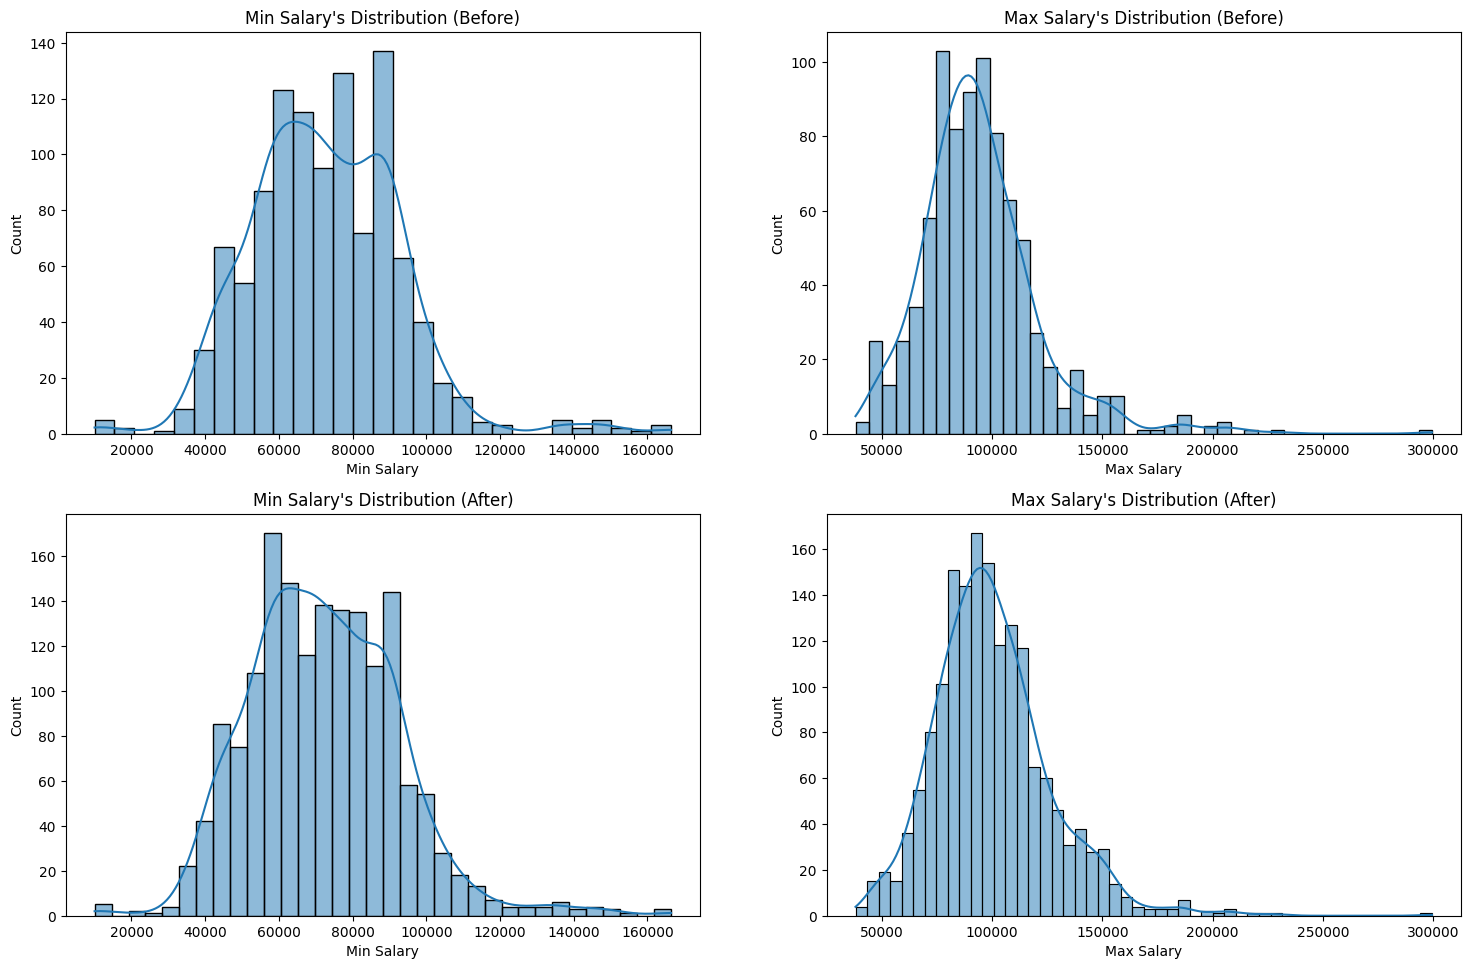

In [39]:
plt.figure(figsize=(18,24))

plt.subplot(4,2,1)
sns.histplot(data['Min Salary'], kde=True)
plt.title("Min Salary's Distribution (Before)")

plt.subplot(4,2,2)
sns.histplot(data['Max Salary'], kde=True)
plt.title("Max Salary's Distribution (Before)")

plt.subplot(4,2,3)
sns.histplot(result_df['Min Salary'], kde=True)
plt.title("Min Salary's Distribution (After)")

plt.subplot(4,2,4)
sns.histplot(result_df['Max Salary'], kde=True)
plt.title("Max Salary's Distribution (After)")

In [40]:
data['Min Salary'] = result_df['Min Salary']
data['Max Salary'] = result_df['Max Salary']

In [41]:
def average_salary(data, new_cols):
    for index in range(len(data)):
        average = (data['Min Salary'] + data['Max Salary'])/2
        data[new_cols] = average
        return data[new_cols]
average_salary(data, 'Average Salary')

0       127369.0
1        88317.5
2       119121.0
3        96437.5
4       122771.5
          ...   
1647     84500.0
1648    102000.0
1649     90000.0
1650     55500.0
1651    112500.0
Name: Average Salary, Length: 1652, dtype: float64

In [42]:
data

,Job Title,Position,Company,Job Type,Skill,Work Type,Industry Type,Seniority,City,Province,Min Salary,Max Salary,Average Salary
0,Binance Accelerator Program - Data Analyst (Risk),Data Analyst,Binance,Full-Time,"Python, Sql",Remote,Cryptocurrency Exchange,ANY,Remote,Undef,113750.0,140988.0,127369.0
1,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Full-Time,"Power Bi, Power BI, Excel",Remote,Research,ANY,Remote,Undef,79185.0,97450.0,88317.5
2,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Full-Time,Undef,In-Person,Others,ANY,Ottawa,ON,116721.0,121521.0,119121.0
3,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Full-Time,"Fabric, Power BI, Sql, Machine Learning, Genes...",In-Person,Service,ANY,Toronto,ON,87875.0,105000.0,96437.5
4,"Business Intelligence Specialist, Ft",Business Analyst,Niagara Health System,Full-Time,"Azure, Power BI, SQL, Aws",In-Person,Healthcare,Senior,Niagara,ON,115211.0,130332.0,122771.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,Im Business Analyst,Business Analyst,Messa,Full-Time,Information architecture,In-Person,Others,ANY,Ottawa,ON,67000.0,102000.0,84500.0
1648,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Full-Time,"SQL, Operational risk management, Vendor manag...",In-Person,Others,ANY,Markham,ON,94000.0,110000.0,102000.0
1649,Business Intelligence Analyst,Business Analyst,Clio,Full-Time,"Power BI, Data modeling, Business intelligence...",In-Person,Others,ANY,Vancouver,BC,86000.0,94000.0,90000.0
1650,"Analyst, Supply Chain Replenishment",AI Analyst,Loblaw Companies Limited,Full-Time,"SQL, SAP, Computer skills, Marketing, Workday",In-Person,Others,ANY,Brampton,ON,52000.0,59000.0,55500.0


In [56]:
data.to_csv('Fix_Cleaned_Dataset.csv', index = False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Exploratory Data Analysis

**The answer to this analysis problem can be seen in the Dashboard Interface GUI that has been created using custom Tkinter.**

In [1]:
%run GUI_Development.py

In [1]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2024.8.30
chardet                      4.0.0
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
customtkinter                5.2.2
cycler                       0.12.1
darkdetect                   0.8.0
debugpy                      1.8.9
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.1
h5py                         3.12.1
idna                         2.10
ipykernel                    6.29.5
ipython                      8.30.0
jedi                         0.19.2
